In [1]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
 
# importing the data
df = pd.read_excel('Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
df_recency = df.groupby(by='Customer Name',
                        as_index=False)['Order Date'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2016-11-10,415
1,Aaron Hawkins,2017-12-18,12
2,Aaron Smayling,2017-10-03,88
3,Adam Bellavance,2017-11-06,54
4,Adam Hart,2017-11-26,34


In [5]:
df_recency['LastPurchaseDate'].max()

Timestamp('2017-12-30 00:00:00')

In [6]:
frequency_df = df.drop_duplicates().groupby(
    by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


In [7]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


In [8]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


In [10]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,9.033481,12.925599,10.466583
1,Aaron Hawkins,12,11,11459.552,90.524321,45.334174,56.242119
2,Aaron Smayling,88,10,9088.880,46.178143,37.957125,46.153846
3,Adam Bellavance,54,18,35390.580,59.444093,81.336696,91.929382
4,Adam Hart,34,20,9664.265,72.899558,87.641866,48.802018


In [11]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Bergman,0.55
1,Aaron Hawkins,2.92
2,Aaron Smayling,2.19
3,Adam Bellavance,4.20
4,Adam Hart,3.16
5,Adam Shillingsburg,3.82
6,Adrian Barton,4.58


In [12]:
rfm_df['RFM_Score'].describe()

count    793.000000
mean       2.503909
std        1.183623
min        0.040000
25%        1.530000
50%        2.580000
75%        3.460000
max        4.840000
Name: RFM_Score, dtype: float64

Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.5 : Low-value customer
rfm score<1.5 :Lost Customer

In [13]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5,
                                      "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
                                rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.5,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Aaron Bergman,0.55,Lost Customers
1,Aaron Hawkins,2.92,Low Value Customers
2,Aaron Smayling,2.19,Low Value Customers
3,Adam Bellavance,4.20,High value Customer
4,Adam Hart,3.16,Medium Value Customer
5,Adam Shillingsburg,3.82,Medium Value Customer
6,Adrian Barton,4.58,Top Customers
7,Adrian Hane,2.64,Low Value Customers
8,Adrian Shami,0.60,Lost Customers
9,Aimee Bixby,1.68,Low Value Customers


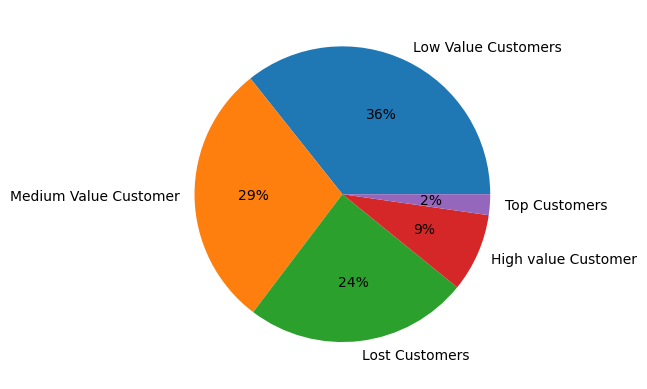

In [14]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()